=== РЕЗУЛЬТАТЫ ===
Размер выборки: N = 393
Оценка параметров модели:
  a = 0.0265
  b = 1.7668

Проверка гипотезы (нормальность остатков):
  KS-статистика: D = 0.0603
  Критическое значение (alpha = 0.05): D_crit = 0.0686

Вывод: Гипотеза о нормальности остатков НЕ отвергается. Модель адекватна.
Можно описать зависимость: Insulin = 0.0265 * Glucose^1.7668


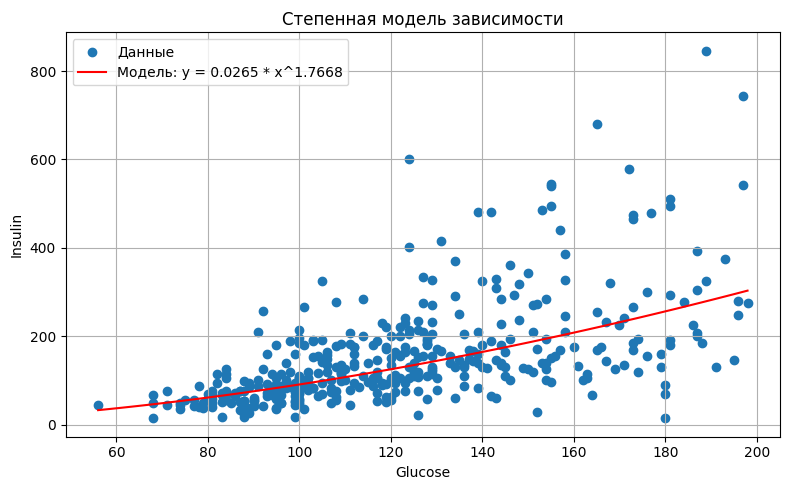

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

df = pd.read_csv('diabetes.csv')

df = df[(df['Glucose'] > 0) & (df['Insulin'] > 0)]

log_glucose = np.log(df['Glucose'])
log_insulin = np.log(df['Insulin'])

b, log_a = np.polyfit(log_glucose, log_insulin, 1)
a = np.exp(log_a)

predicted_log_insulin = log_a + b * log_glucose
residuals = log_insulin - predicted_log_insulin

residuals_std = (residuals - np.mean(residuals)) / np.std(residuals)

ks_stat, p_value = kstest(residuals_std, 'norm')

N = len(residuals_std)
D_crit_05 = 1.36 / np.sqrt(N)

print("=== РЕЗУЛЬТАТЫ ===")
print(f"Размер выборки: N = {N}")
print(f"Оценка параметров модели:")
print(f"  a = {a:.4f}")
print(f"  b = {b:.4f}")
print("\nПроверка гипотезы (нормальность остатков):")
print(f"  KS-статистика: D = {ks_stat:.4f}")
print(f"  Критическое значение (alpha = 0.05): D_crit = {D_crit_05:.4f}")
# print(f"  P-value: {p_value:.4f}")

if ks_stat < D_crit_05:
    print("\nВывод: Гипотеза о нормальности остатков НЕ отвергается. Модель адекватна.")
    print(f"Можно описать зависимость: Insulin = {a:.4f} * Glucose^{b:.4f}")
else:
    print("\nВывод: Гипотеза о нормальности остатков отвергается. Модель неадекватна.")

plt.figure(figsize=(8, 5))
plt.scatter(df['Glucose'], df['Insulin'], label='Данные')
x_vals = np.linspace(df['Glucose'].min(), df['Glucose'].max(), 100)
y_vals = a * x_vals**b
plt.plot(x_vals, y_vals, color='red', label=f'Модель: y = {a:.4f} * x^{b:.4f}')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Степенная модель зависимости')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()